In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Machine Learning & Reinforcement Learning 
## Session 06a - Data Organization
- Missing Data
- Categorical Data
- label encoding
- One hot encoding
- SMOTE
- Standardization/ Normalisation
- Feature Selection
- ANOVA
- Train Test Split

<img src='../../../prasami_images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [2]:
###------------------
### Import statements
###------------------

import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir = os.path.join('..', '..', '..', 'input')

# set location of inputs for this module
moduleDir = 'machine_learning'

# set location of output files
outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.1
N_SAMPLES = 1000
ALPHA = 0.001

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.25

<Figure size 1500x700 with 0 Axes>

## Missing Data and Imputer Class
Lets look at Titanic Dataset

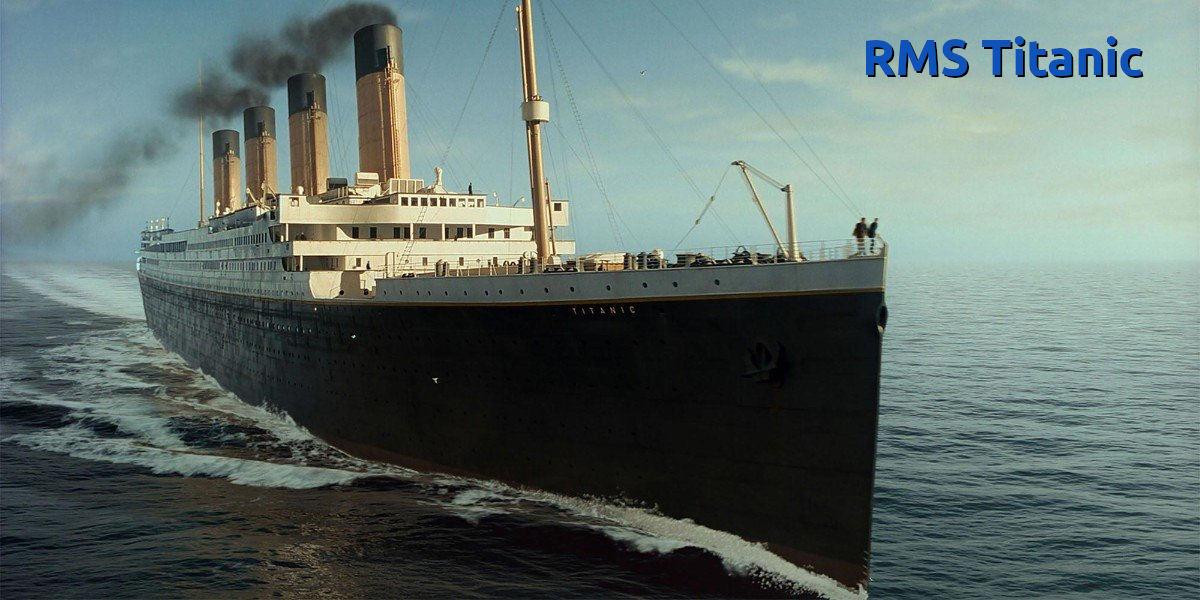

## Data

### Description

|Variable|Definition|Key|Notes|
|:-:|:-:|:-:|:-:|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class |1 = 1st, 2 = 2nd, 3 = 3rd|A proxy for socio-economic status (SES):1st = Upper; 2nd = Middle; 3rd = Lower
|sex|Gender 	
|age|Age in years|age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
|sibsp|# of siblings / spouses aboard the Titanic||sibsp: Sibling = brother, sister, stepbrother, stepsister; Spouse = husband, wife (mistresses and fiancés were ignored)
|parch|# of parents / children aboard the Titanic||parch: Parent = mother, father; Child = daughter, son, stepdaughter, stepson; Some children traveled only with a nanny, therefore parch=0 for them. 	
|ticket|Ticket number 	
|fare|Passenger fare 	
|cabin|Cabin number 	
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
titanic_df = pd.read_csv(os.path.join(inpDir, moduleDir,"titanic.csv"))
titanic_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


### Look at the range of values in each of the columns

Collect unique values from each of the columns!

In [5]:
unique_values = {}

for key in titanic_df.keys():
    
    unique_values[key] = pd.unique(titanic_df[key].values)

    print (f'{key } : {unique_values[key]}\n')

pclass : [1 2 3]

name : ['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']

sex : ['female' 'male']

age : [29.      0.9167  2.     30.     25.     48.     63.     39.     53.
 71.     47.     18.     24.     26.     80.         nan 50.     32.
 36.     37.     42.     19.     35.     28.     45.     40.     58.
 22.     41.     44.     59.     60.     33.     17.     11.     14.
 49.     76.     46.     27.     64.     55.     70.     38.     51.
 31.      4.     54.     23.     43.     52.     16.     32.5    21.
 15.     65.     28.5    45.5    56.     13.     61.     34.      6.
 57.     62.     67.      1.     12.     20.      0.8333  8.      0.6667
  7.      3.     36.5    18.5     5.     66.      9.      0.75   70.5
 22.5     0.3333  0.1667 40.5    10.     23.5    34.5    20.5    30.5
 55.5    38.5    14.5    24.5    60.5    74.      0.4167 11.5    26.5   

Listing unique values gives a reasonable understanding of what is in those columns!

### Is there any missing data?
Display Info of the dataframe.

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


Columns with missing information: `age`, `embarked`, `fare` and `cabin`!

Another way to look at is sum of nan values

In [7]:
titanic_df.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

### Approach 1: Remove column with missing data
- Careful: you may lose some valuable information
- In case of `Cabin`, we have 1014 rows with missing information. We can remove the column without losing much of information.
- While at it, columns like `name`,`ticket`,  `cabin` and `fare` are not contributing to analysis. Hence can be dropped.
- In theory, port of embarkation also does not mean much while predicting survival rate but lets keep it for the time being. 

In [8]:
# list of columns to be removed
drop_col = ['name', 'ticket',  'cabin', 'fare']

# removing listed columns
titanic_df = titanic_df.drop(drop_col, axis = 1)

titanic_df.head()

,pclass,sex,age,sibsp,parch,embarked,survived
0,1,female,29.0000,0,0,S,1
1,1,male,0.9167,1,2,S,1
2,1,female,2.0000,1,2,S,0
3,1,male,30.0000,1,2,S,0
4,1,female,25.0000,1,2,S,0


### Approach 2: Impute with Mode/ Median / Mean
embarked has only two missing value

In [9]:
titanic_df[titanic_df.embarked.isnull()]

,pclass,sex,age,sibsp,parch,embarked,survived
168,1,female,38.0,0,0,NaN,1
284,1,female,62.0,0,0,NaN,1


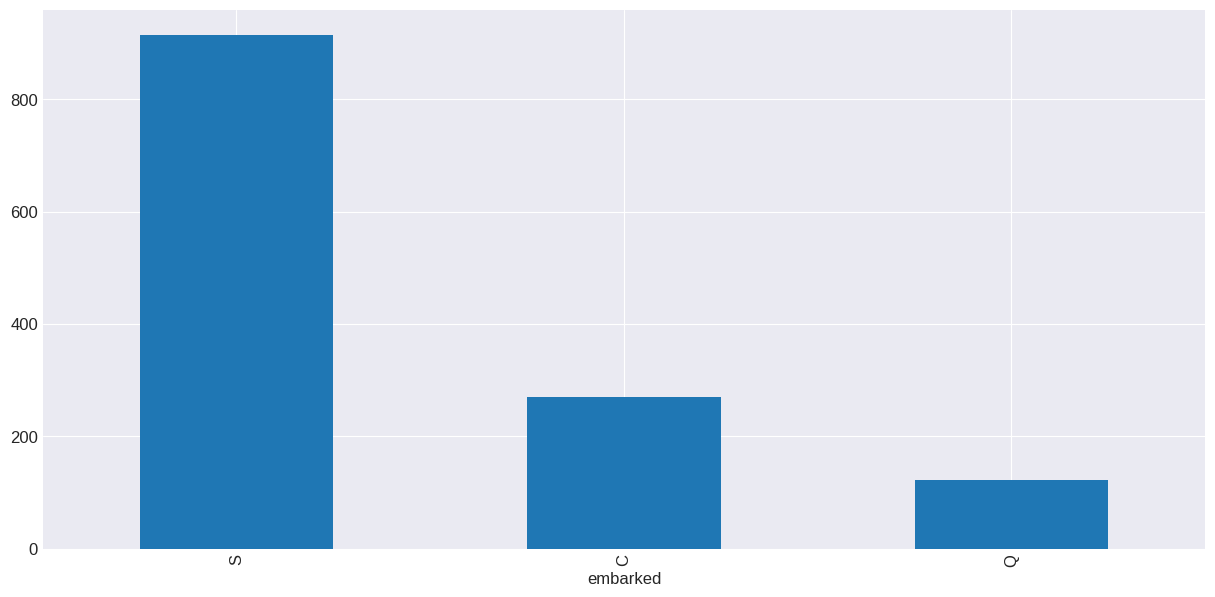

In [10]:
titanic_df.embarked.value_counts().plot(kind = 'bar');

Most of the person boarded from `S` i.e. Southampton. We can assume missing values to be S without introducing much of an error/noise. We can update dataframe **in-place** too!

In [11]:
titanic_df['embarked'].mode()[0]

'S'

In [12]:
titanic_df['embarked']= titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0])

titanic_df.iloc[[168, 284]]

,pclass,sex,age,sibsp,parch,embarked,survived
168,1,female,38.0,0,0,S,1
284,1,female,62.0,0,0,S,1


### Age
- It has a few `nan`. We can either assume these values to be -1 or 999 (make them outliers)
- Alternatively impute with mode, median or mean. Refer plot below it may make more sense of we impute with mean.
- Fraction will tell us that its imputed and Median is not significantly higher than neighbors.

- It may be worth exploring if we want to take means by `Gender`

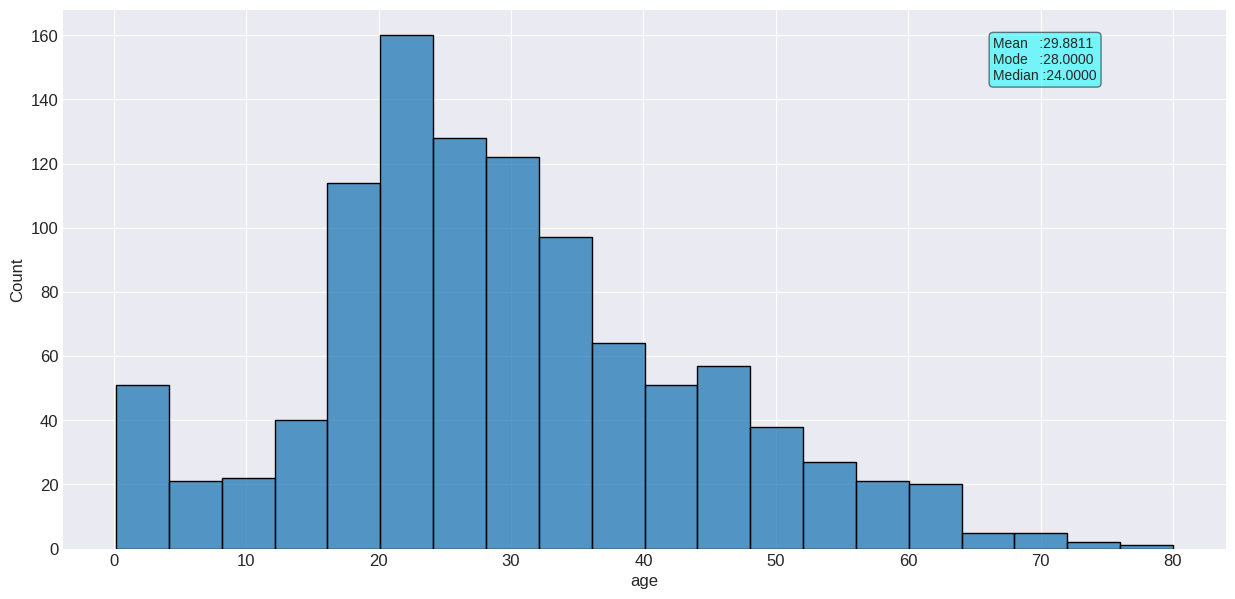

In [13]:
ax = sns.histplot(titanic_df, x = 'age', bins = 20)

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

# little beautification
fmtStr =  'Mean   :{:7.4f}\nMode   :{:7.4f}\nMedian :{:7.4f}'
txtstr =fmtStr.format(titanic_df['age'].mean(),
                      titanic_df['age'].median(), titanic_df['age'].mode()[0]) #text to plot
# place a text box in upper left in axes coords

ax.text(0.8, 0.95, txtstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props);

In [14]:
titanic_df[titanic_df.age.isnull()]

,pclass,sex,age,sibsp,parch,embarked,survived
15,1,male,NaN,0,0,S,0
37,1,male,NaN,0,0,S,1
40,1,male,NaN,0,0,C,0
46,1,male,NaN,0,0,S,0
59,1,female,NaN,0,0,C,1
...,...,...,...,...,...,...,...
1293,3,male,NaN,0,0,S,0
1297,3,male,NaN,0,0,S,0
1302,3,male,NaN,0,0,C,0
1303,3,male,NaN,0,0,C,0


In [15]:
data_df = titanic_df['age'].fillna(titanic_df['age'].mean()).copy()

data_df.head()

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

### Averages by `Gender`

In [16]:
# calculate class
classmeans = titanic_df.pivot_table('age', columns='sex', aggfunc='mean')
classmeans

sex,female,male
age,28.687071,30.585233


In [17]:
classmeans['female']['age']

28.6870706185567

In [18]:
titanic_df.age = titanic_df[['age', 'sex']].apply(
    lambda x: classmeans[x['sex']]['age'] if pd.isnull(x['age']) else x['age'], axis=1 )

In [19]:
titanic_df.iloc[[15, 59]]

,pclass,sex,age,sibsp,parch,embarked,survived
15,1,male,30.585233,0,0,S,0
59,1,female,28.687071,0,0,C,1


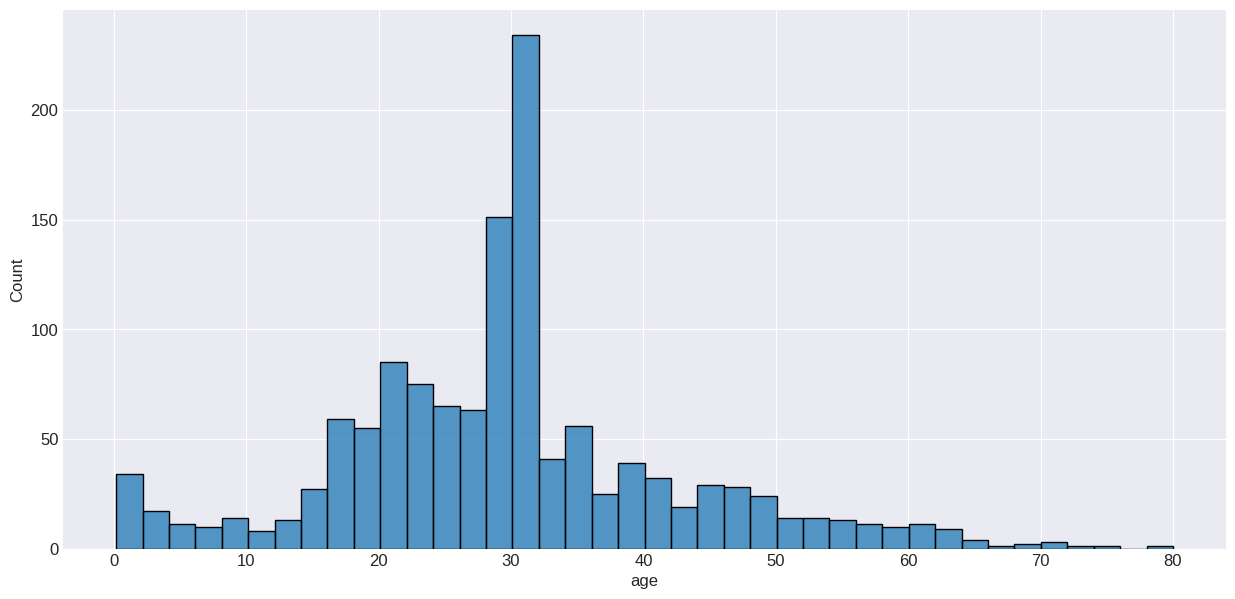

In [20]:
sns.histplot(titanic_df, x = 'age', bins = 40);

## Label Encoder vs One-hot Encoding
- We have two categorical columns left i.e. `sex` and  `embarked`.
- In theory, `pclass` too is categorical but there is trend. 'pclass' 1 will get priority in boarding a lifeboat hence its ok to keep 1,2,3 numbers there.
- In general, Genders do not have any hierarchy. However, Females were given preferences in boarding the lifeboats. Hence, we can use label encoder to convert the column

In [21]:
le = LabelEncoder()

le.fit(titanic_df['sex'])

print (le.classes_)

titanic_df['sex'] = le.transform(titanic_df['sex'])

['female' 'male']


## Categorical Variables also know as Dummy Variables

Lets look at `embarked` column. There is no such hierarchy in this column and hence it is highly recommended to use **one-hot-encoding**

**Note**: Pandas has get dummies functions

In [22]:
titanic_df = pd.get_dummies(titanic_df, columns = ['embarked'], dtype = np.int16)

In [23]:
titanic_df.isnull().sum()

pclass        0
sex           0
age           0
sibsp         0
parch         0
survived      0
embarked_C    0
embarked_Q    0
embarked_S    0
dtype: int64

In [24]:
y = titanic_df['survived'].to_numpy()

features = titanic_df.drop('survived',axis=1).to_numpy()

scaler = StandardScaler().fit(features)

X = scaler.transform(features)

lr = LogisticRegression()

lr.fit(X,y)

LogisticRegression()

In [25]:
y_pred = lr.predict(X)

accuracy_score( y_pred, y)

0.7891520244461421

## [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

Imagine credit card based fraud detection problem. In such problems, we generally observe that 1 out of million transaction is fraudulent. So a binary classifier model need not be a complex model to predict all outcomes as 0 meaning non-fraudulent and achieve a great accuracy of 99.9999%. Such result is of no use.

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the over-fitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. This parameter is configurable and can be tuned. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector.

In [26]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_classes=2, class_sep=2, 
                           weights=[0.1, 0.9], 
                           n_informative=3, 
                           n_redundant=1, 
                           flip_y=0, 
                           n_features=20, 
                           n_clusters_per_class=1, 
                           n_samples=N_SAMPLES, random_state=RANDOM_STATE)

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=RANDOM_STATE)

X_res, y_res = sm.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({1: 900, 0: 900})


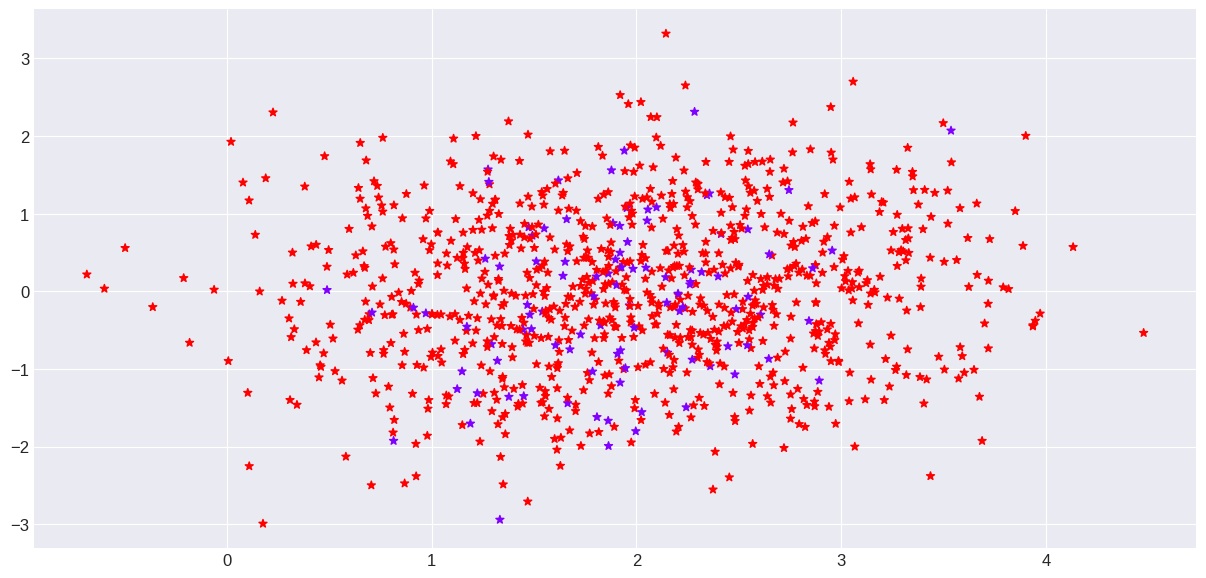

In [27]:
plt.scatter(X[:, 0] , X[:, 1] , marker = '*', c = y, cmap = CMAP)

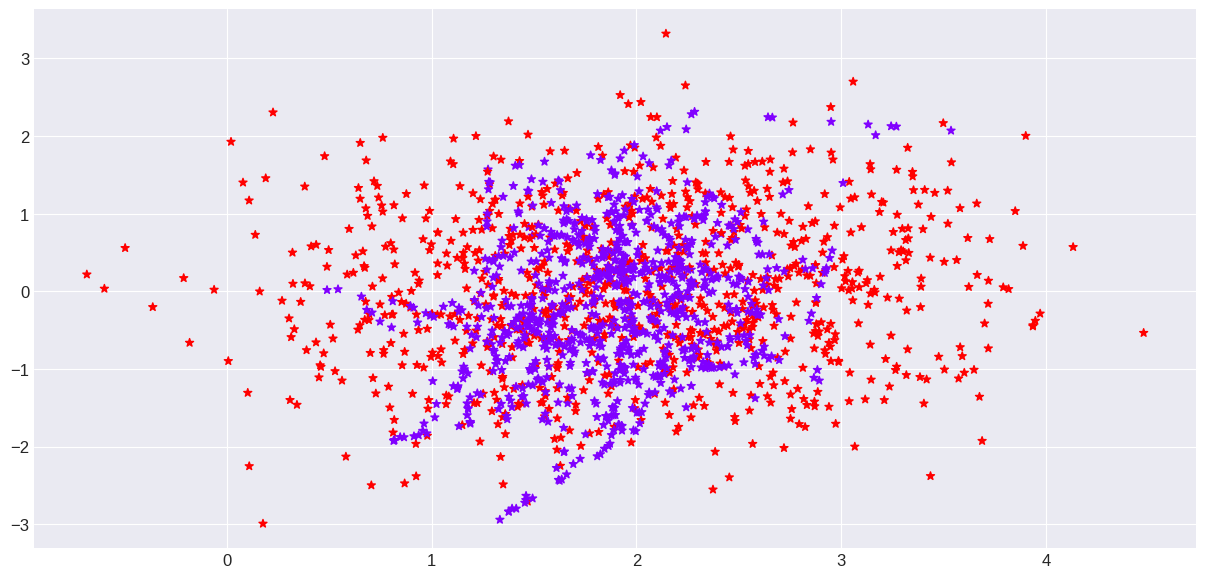

In [28]:
plt.scatter(X_res[:, 0] , X_res[:, 1] , c = y_res, marker = '*', cmap = CMAP)

## Standardization and Normalization

**Data standardization** is the process of converting data to a common format to enable users to process and analyze it. Most organizations utilize data from a number of sources; this can include data warehouses, lakes, cloud storage, and databases. However, data from disparate sources can be problematic if it isn't uniform, leading to difficulties down the line (e.g., when you use that data to produce dashboards and visualizations, etc.). 
Examples: is date format consistent... is time format consistent... what is currency amounts are reported in.

Purely from AI/ML perspective:
**Data normalization** refers to shifting the values of your data so they fall between 0 and 1. 
**Data standardization**, in this context, is used as a scaling technique to establish the mean and the standard deviation at 0 and 1, respectively.

In [29]:
X.shape

(1000, 20)

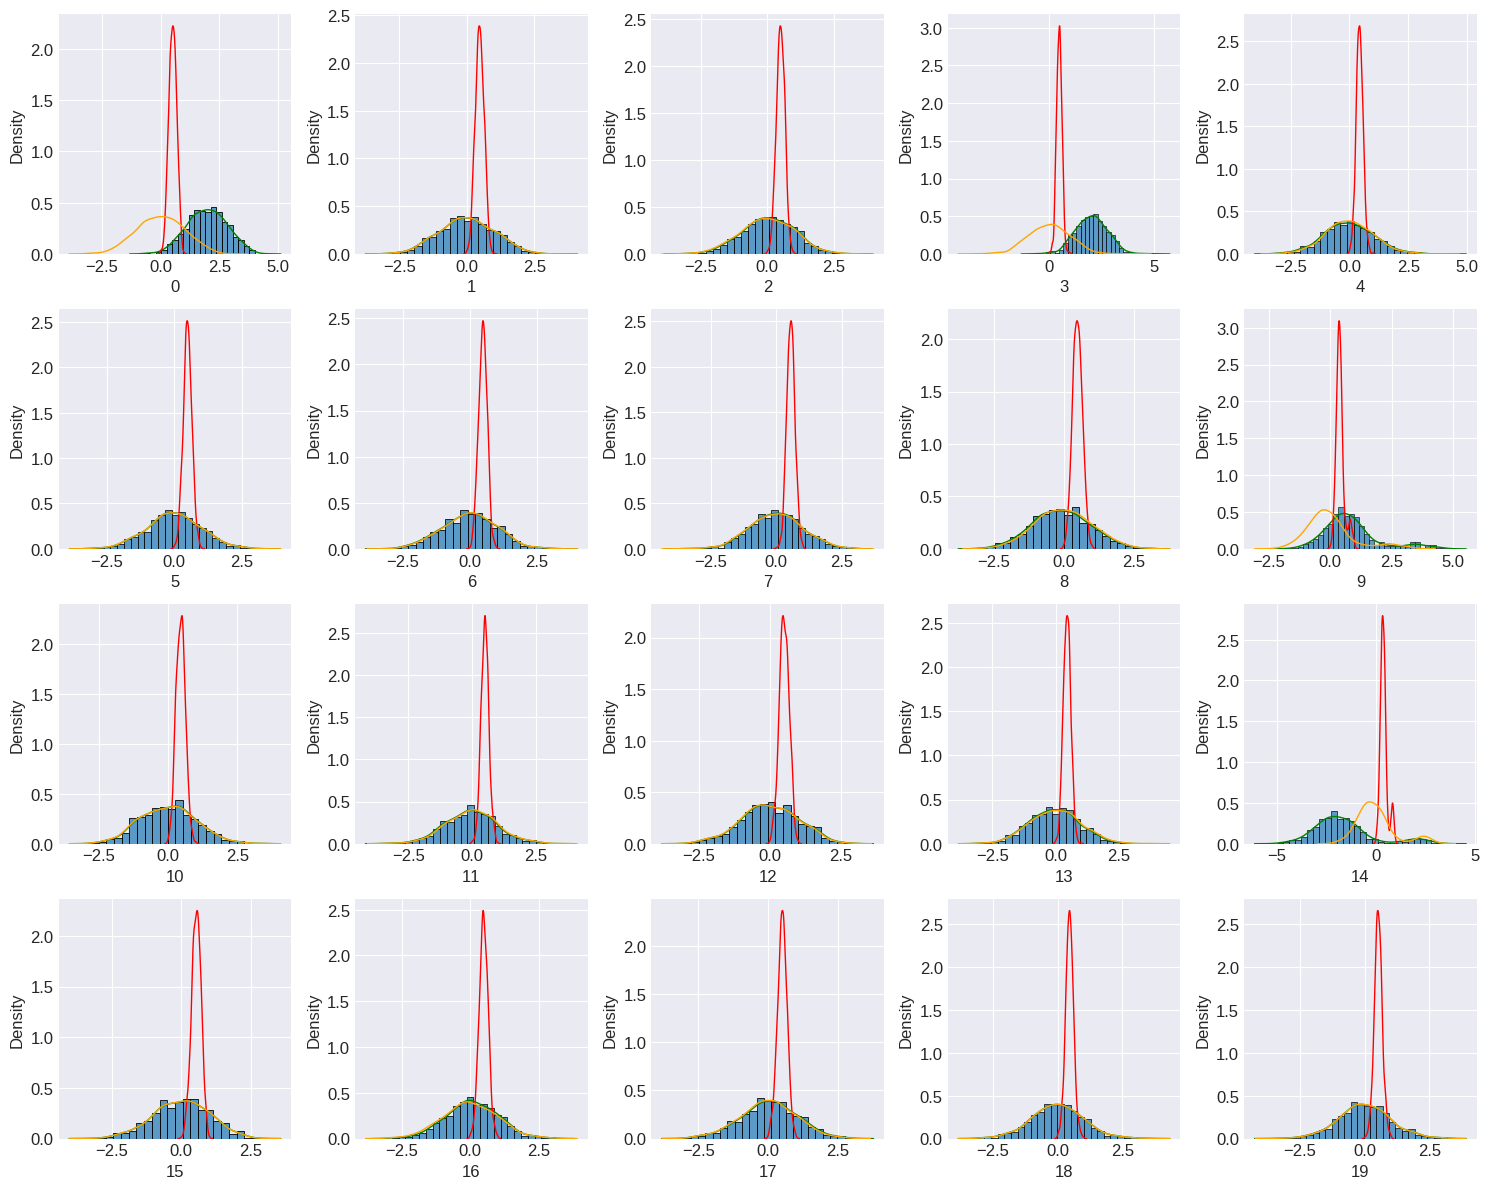

In [30]:
mmc = MinMaxScaler()

sc = StandardScaler()

data_df = pd.DataFrame(X)

mm_df = pd.DataFrame(mmc.fit_transform(X))
sc_df = pd.DataFrame(sc.fit_transform(X))


fig, axes = plt.subplots(4,5, figsize=(15,12))

axes = axes.ravel()

for k in data_df.keys():

    ax = axes[k]
    sns.histplot(data_df, x = k, ax = ax, alpha = 0.7, stat='density')
    sns.kdeplot(data_df, x = k, ax = ax, c = 'g')
    
    sns.kdeplot(mm_df, x = k, ax = ax, c = 'r')
    sns.kdeplot(sc_df, x = k, ax = ax, c = 'Orange')
    

plt.tight_layout()   

## Feature Selection
### Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:
- SelectKBest removes all but the k highest scoring features
- SelectPercentile removes all but a user-specified highest scoring percentage of features
- using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.
- GenericUnivariateSelect allows to perform univariate feature
    - selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

The Chi-square($\chi^2$) test is intended to test how likely it is that an observed distribution is due to chance. Also called  a *goodness of fit* statistic, because it measures how well the observed distribution of data fits with the distribution that is expected if the variables are independent. 

Only for categorical data, will not work with parametric or continuous data, We can select 2 best features from iris dataset as follows:

### Compute the Chi-square($\chi^2$) for the provided sample.

In [33]:
from sklearn.feature_selection import SelectKBest, chi2

# CSV file name
iris_file = os.path.join(inpDir, moduleDir, 'iris.csv')

# Define feature names

iris_features = ['sepal length',
                 'sepal width',
                 'petal length',
                 'petal width',
                 'target']
# Read the CSV file
iris_df = pd.read_csv(iris_file, sep=',', skiprows=1, 
                      header=None, names = iris_features)


y = iris_df['target'].to_numpy()

features = iris_df.drop('target',axis=1).to_numpy()

scaler = MinMaxScaler().fit(features) # Chi Square would not work with negative data

X = scaler.transform(features)

selector = SelectKBest(chi2, k=2)
selector.fit(X, y)

scores = -np.log10(selector.pvalues_)
scores /= scores.max()


X_new = selector.transform(X)

X_new.shape

(150, 2)

In [34]:
pd.DataFrame(X)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


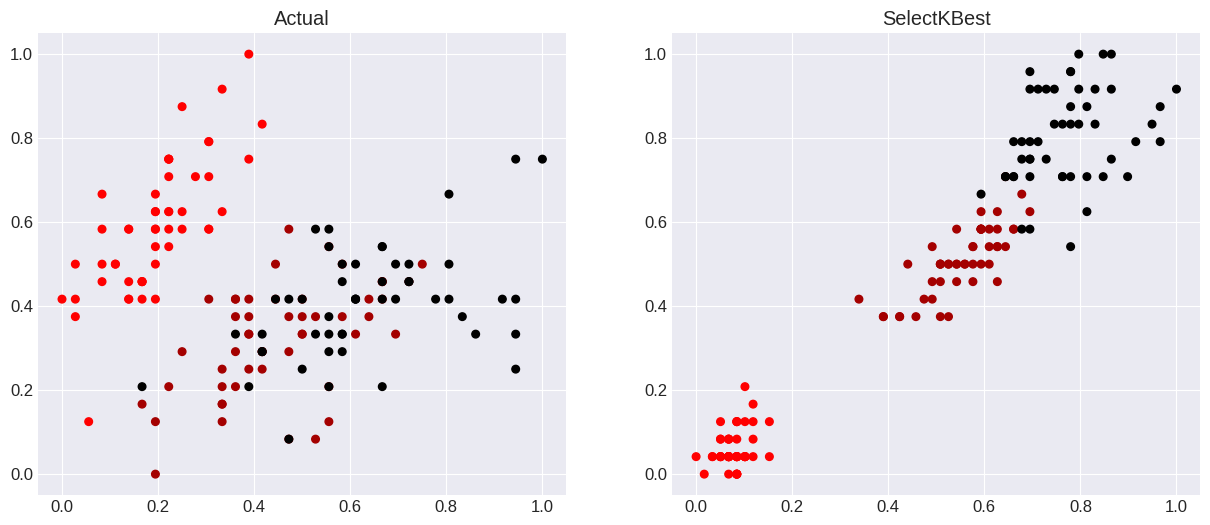

In [36]:
fig, axes = plt.subplots(1,2, figsize =(15,6))

ax = axes[0]

ax.scatter( X [ :, 0], X [ :, 1], c = y, cmap = plt.cm.flag, s = 30 )
ax.set_title('Actual')

ax = axes[1]

ax.scatter( X_new [ :, 0], X_new [ :, 1], c = y, cmap = plt.cm.flag, s = 30 )
ax.set_title('SelectKBest');

In [ ]:
X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

### Compute the ANOVA F-value for the provided sample.

ANOVA, or Analysis of Variance, is a statistical method used to compare the means of three or more groups to determine if there are statistically significant differences between them. It's an extension of the t-test, which compares the means of two groups. ANOVA allows us to compare multiple groups simultaneously.

Here's a breakdown of the key concepts and steps in ANOVA:

- **Null Hypothesis (H0):** The null hypothesis in ANOVA states that there are no significant differences between the means of the groups being compared. It assumes that all group means are equal.
- **Alternative Hypothesis (H1):** The alternative hypothesis suggests that at least one group mean is different from the others.
- **F-statistic:** ANOVA generates an F-statistic, which is the ratio of the variance between groups to the variance within groups. If the F-statistic is sufficiently large, it indicates that the variance between groups is greater than the variance within groups, suggesting that there are significant differences between the group means.
- **Between-group Variance (SSB):** This measures the variability between the means of the different groups. It is calculated as the sum of squares of the differences between each group mean and the overall mean, weighted by the number of observations in each group.
- **Within-group Variance (SSW):** This measures the variability within each group. It is calculated as the sum of squares of the differences between each observation and its group mean.
- **Degrees of Freedom:** Degrees of freedom represent the number of independent pieces of information available for estimating a parameter. In ANOVA, there are two degrees of freedom: one for between-group variance and one for within-group variance.
- **F-distribution:** The F-statistic follows an F-distribution, which is a probability distribution that depends on the degrees of freedom for between-group and within-group variance.
- **Critical F-value:** Based on the chosen significance level (**typically 0.05**), ANOVA determines a critical F-value from the F-distribution. If the computed F-value exceeds the critical F-value, the null hypothesis is rejected, indicating that there are significant differences between at least one pair of group means.

ANOVA is often followed by post-hoc tests, such as Tukey's HSD (Honestly Significant Difference) test, to determine which specific group means are different from each other after finding a significant result in the ANOVA test.



In [ ]:
from scipy.stats import f_oneway

y = iris_df['target'].to_numpy()

X = iris_df.drop('target',axis=1).to_numpy()

In [ ]:
# Perform one-way ANOVA
f_value, p_value = f_oneway(X[:, 0], X[:, 1], X[:, 2], X[:, 3])

print(f'ANOVA F-value: {f_value:7.4f}')
print(f'P-value:       {p_value :7.4f}')


**Note** : Means of original data are quite different

In [ ]:
scaler = MinMaxScaler().fit(X)

X_mm = scaler.transform(X)
# Perform one-way ANOVA
f_value, p_value = f_oneway ( X_mm[:, 0], X_mm[:, 1], X_mm[:, 2], X_mm[:, 3])

print(f'ANOVA F-value: {f_value:7.4f}')
print(f'P-value:       {p_value :7.4f}')

**Note:** Even after MinMaxscaler, means of columns are still significantly different

In [ ]:
scaler = StandardScaler().fit(X)

X_sc = scaler.transform(X)
# Perform one-way ANOVA
f_value, p_value = f_oneway ( X_sc[:, 0], X_sc[:, 1], X_sc[:, 2], X_sc[:, 3])

print(f'ANOVA F-value: {f_value:7.4f}')
print(f'P-value:       {p_value :7.4f}')



### Bingo! now they are same as F-Value is less than 0.05

## Training-Testing Split
In general, validation data is extracted towards roll-out from live data. Initial data is split in Train and Test set using 80:20 split.

Lets load the titanic data again and use it with the Train-Test-Split. We will also learn how to pre-process the data along the way.

**Rule**: Don't let your model peep into test data. Don't share any parameters.

In [ ]:
titanic_df.head()

In [ ]:
features = titanic_df.drop('survived', axis = 1)

labels = titanic_df['survived']

In [ ]:
train_df, test_df, lbl_train, lbl_test = train_test_split(features,
                                                          labels, 
                                                          stratify=labels, 
                                                          test_size=TEST_SIZE, 
                                                          random_state=RANDOM_STATE)

train_df.shape, test_df.shape, lbl_train.shape, lbl_test.shape

In [ ]:
train_df.isnull().sum()

### Verify if columns are same

In [ ]:
train_df.head()

In [ ]:
test_df.head()